<a href="https://colab.research.google.com/github/raulbenitez/DL_AMRITA/blob/main/deep_CIFAR10_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-on Introduction to Deep Learning
AMRITA 2022 Tutorial

---

Raul Benitez, PhD

Universitat Politècnica de Catalunya

contact: raul.benitez@upc.edu

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
folder_data = '/content/drive/MyDrive/DL_AMRITA/CIFAR10'
load_data = 'False' #Set to 'True' to load data and avoid time consuming executions

# Part 1: CIFAR10 data exploration

## Load CIFAR10 data

In [3]:
from tensorflow import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
import numpy as np
import os

# The data, split between train and test sets 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('Data is already in the tensorflow format:')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

n_classes = np.unique(y_train).shape[0]
h = x_train.shape[1]
w = x_train.shape[2]
ch = x_train.shape[3]

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

# Have it as an array of integers:
y_test1 = np.argmax(y_test,axis=1)
y_train1 = np.argmax(y_train,axis=1)

170508288/170498071 [==============================] - 2s 0us/step
Data is already in the tensorflow format:
x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


## Visualize image dataset 

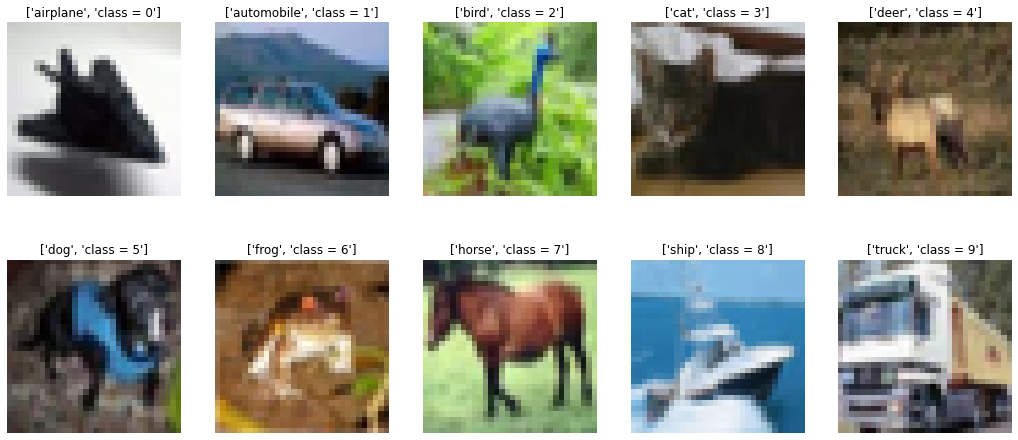

In [6]:
import skimage as sk # load skimage libraries
from skimage import io
import matplotlib.pylab as plt

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig = plt.figure(figsize=(18, 8))

for kclass in range(0,10):
    ind = np.argwhere(y_train1==kclass)
    ax = fig.add_subplot(2, 5, kclass+1)
    ax.imshow(x_train[ind[0][0]]) 
    ax.set_title([label_names[kclass], 'class = {}'.format(kclass)])
    ax.axis('off')

## Low-dimension projections of the MNIST test data subset

## 2D PCA projection

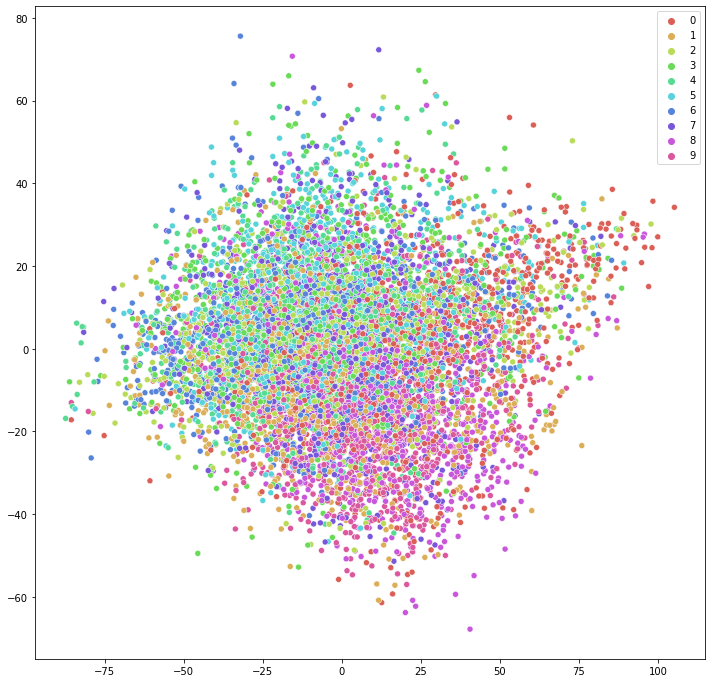

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Reshape datasets as NOBSERVATIONS x NPIXELS (Flatten):
train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

# Scale (Standardization)
train = StandardScaler().fit_transform(train)
test = StandardScaler().fit_transform(test)

# PROJECT TO A 2D PCA SPACE:
pca = PCA(n_components=2)
pca_proj = pca.fit_transform(test)

fig = plt.figure(figsize=(12,12))
sns.scatterplot(x = pca_proj[:,0], y = pca_proj[:,1], hue = y_test1, palette = sns.hls_palette(n_classes), legend = 'full')
plt.show()

In [8]:
print('The size of flattened training data is {}'.format(train.shape))
print('The size of flattened test data is {}'.format(test.shape))
print('The size of the 2D PCA projection of the test data is {}'.format(pca_proj.shape))

The size of flattened training data is (50000, 3072)
The size of flattened test data is (10000, 3072)
The size of the 2D PCA projection of the test data is (10000, 2)


No surprise that all classes are entangled in the 2d PCA projection since the variance explained by a 2D PCA projection is only a fraction of the total variability:

In [9]:
pca.explained_variance_ratio_.cumsum()

array([0.26998188, 0.38049943])

## T-SNE projection 

Visualizing high-dimensional data by projecting it into a low-dimensional space

https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding

https://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


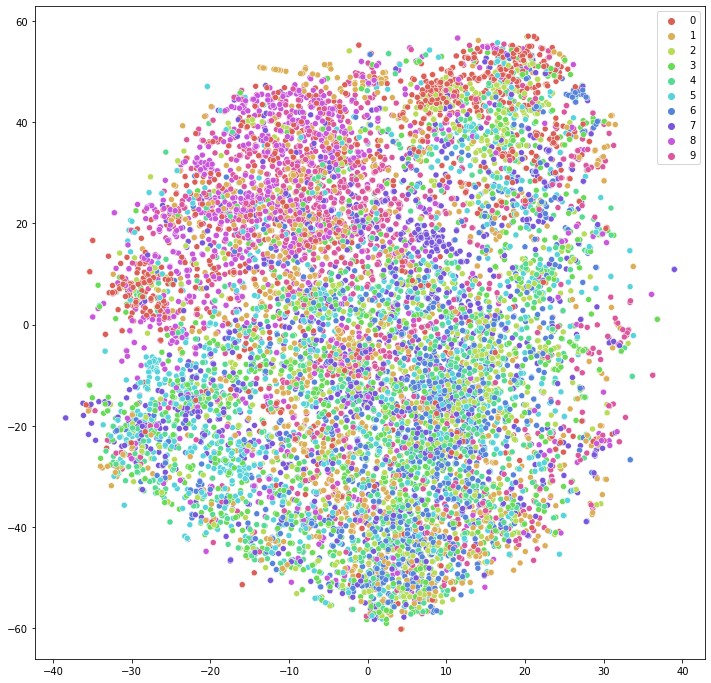

In [10]:
from sklearn.manifold import TSNE

if load_data == 'False':
  tsne = TSNE(n_components = 2, random_state=0)
  tsne_res = tsne.fit_transform(test)
else:
  data = np.load(folder_data+'/tsne.npz')
  tsne_res = data['arr_1']

fig = plt.figure(figsize=(12,12))
sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = y_test1, palette = sns.hls_palette(n_classes), legend = 'full');

# Part 2: The Traditional Machine Learning approach



## Fit a KNN classifier using raw data

In [ ]:
load_data = 'False'

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

if load_data == 'False':
  knn_raw = KNeighborsClassifier(n_neighbors=2) # load the model
  knn_raw.fit(train,y_train1) # fit the model using training data
  y_test_pred_raw = knn_raw.predict(test) # model prediction of test data

  pickle.dump(knn_raw, open(folder_data+'/knn_raw_model.sav', 'wb'))
  np.savez(folder_data+'/y_test_pred_raw.npz', y_test_pred_raw)

else:
  knn_raw = pickle.load(open(folder_data+'/knn_raw_model.sav', 'rb'))
  data = np.load(folder_data+'/y_test_pred_raw.npz')
  y_test_pred_raw = data['arr_0']

              precision    recall  f1-score   support

    airplane       0.34      0.62      0.44      1000
  automobile       0.60      0.28      0.38      1000
        bird       0.21      0.51      0.30      1000
         cat       0.27      0.32      0.29      1000
        deer       0.23      0.40      0.29      1000
         dog       0.34      0.20      0.25      1000
        frog       0.33      0.16      0.21      1000
       horse       0.66      0.15      0.25      1000
        ship       0.47      0.46      0.47      1000
       truck       0.84      0.07      0.13      1000

    accuracy                           0.32     10000
   macro avg       0.43      0.32      0.30     10000
weighted avg       0.43      0.32      0.30     10000



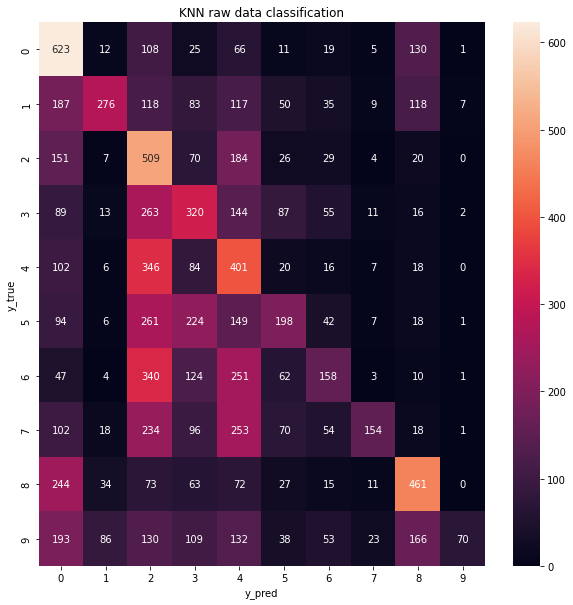

In [27]:
cm_raw = confusion_matrix(y_test1, y_test_pred_raw)

fig = plt.figure(figsize=(10, 10))

sns.heatmap(cm_raw,annot = True,fmt = ".0f")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title('KNN raw data classification')

print(classification_report(y_test1, y_test_pred_raw, target_names=label_names))

## Fit a kNN classifier using PCA features: eigenfaces

Use PCA to extract features from the images and classify them using a KNN  algorithm. Keep as many PCA components as needed to explain 95% of the variance in the training set.

In [31]:
# GET PCA FEATURES PROJECTING TO THE PCA SPACE:
pca_full = PCA(n_components=test.shape[1])
pca_full.fit(test)
cummulative_variance = pca_full.explained_variance_ratio_.cumsum()

# Find number of components needed to explain 95% of variance:
ind= np.argwhere(cummulative_variance>0.95)
Ncomponents_95 = ind[0].item()
pca95 = PCA(n_components=Ncomponents_95)
pca_train = pca95.fit_transform(train)
pca_test = pca95.fit_transform(test)

print('Number of PCA components needed to explain 95% of variability is {}'.format(Ncomponents_95))
print('The PCA training set has dimensions {} {}'.format(*pca_train.shape))
print('The PCA test set has dimensions {} {}'.format(*pca_test.shape))

Number of PCA components needed to explain 95% of variability is 214
The PCA training set has dimensions 50000 214
The PCA test set has dimensions 10000 214


In [32]:
from sklearn.neighbors import KNeighborsClassifier

if load_data == 'False':
  knn = KNeighborsClassifier(n_neighbors=2) # load the model
  knn.fit(pca_train,y_train1) # fit the model using training data
  y_test_pred = knn.predict(pca_test) # model prediction of test data

  pickle.dump(knn, open(folder_data+'/knn_pca_model.sav', 'wb'))
  np.savez(folder_data+'/y_test_pred.npz', y_test_pred)

else:
  knn = pickle.load(open(folder_data+'/knn_pca_model.sav', 'rb'))
  data = np.load(folder_data+'/y_test_pred.npz')
  y_test_pred = data['arr_0']


              precision    recall  f1-score   support

    airplane       0.25      0.47      0.33      1000
  automobile       0.28      0.09      0.13      1000
        bird       0.15      0.37      0.21      1000
         cat       0.19      0.22      0.20      1000
        deer       0.17      0.33      0.23      1000
         dog       0.23      0.13      0.16      1000
        frog       0.20      0.11      0.14      1000
       horse       0.21      0.03      0.06      1000
        ship       0.35      0.34      0.34      1000
       truck       0.40      0.02      0.03      1000

    accuracy                           0.21     10000
   macro avg       0.24      0.21      0.18     10000
weighted avg       0.24      0.21      0.18     10000



Text(0.5, 1.0, 'KNN pca features classification')

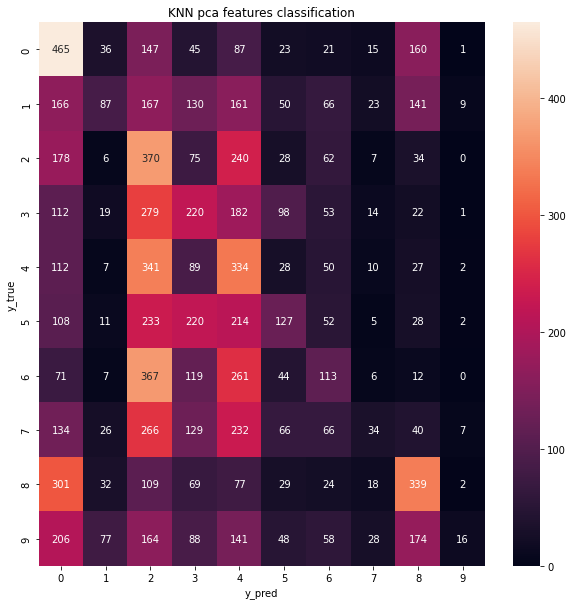

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print(classification_report(y_test1, y_test_pred, target_names=label_names))

cm = confusion_matrix(y_test1, y_test_pred)

fig = plt.figure(figsize=(10, 10))

sns.heatmap(cm,annot = True,fmt = ".0f")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title('KNN pca features classification')

Traditional features do not always represent the full complexity of the classification problem

# Part 3: The DL approach

## Fully trained model

Custom CNN for both feature extraction and classification: 

Get the results in the case of not having aumented data whd using batch_size = 32
epochs = 2


https://keras.io/examples/cifar10_cnn/

In [35]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation('softmax',name='visualize_this'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_5 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_6 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                      

Train the model with training subset:

In [36]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

batch_size = 32
epochs = 2

model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/2
1563/1563 [==============================] - 276s 174ms/step - loss: 1.8043 - accuracy: 0.3427 - val_loss: 1.5120 - val_accuracy: 0.4554
Epoch 2/2
1563/1563 [==============================] - 251s 160ms/step - loss: 1.4877 - accuracy: 0.4599 - val_loss: 1.3343 - val_accuracy: 0.5210


In [37]:
if load_data == 'False':
  model.save(folder_data + '/model_saved') # save trained model
else: 
  model = keras.models.load_model(folder_data + '/model_saved')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/DL_AMRITA/CIFAR10/model_saved/assets


Get performace measures evaluating with the test subset:

In [39]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

from sklearn.metrics import confusion_matrix,classification_report

y_pred = model.predict(x_test)
y_pred1 = np.argmax(y_pred,axis=1)


cm = confusion_matrix(y_test1, y_pred1)

print(cm)
print(classification_report(y_test1, y_pred1, target_names=label_names))

313/313 [==============================] - 16s 51ms/step - loss: 1.3343 - accuracy: 0.5210
Test loss: 1.3343356847763062
Test accuracy: 0.5210000276565552
[[595  83  64  25  13   3  31  12 133  41]
 [ 32 791   6   9   3   0  24  12  37  86]
 [ 93  34 403  92 106  41 132  46  31  22]
 [ 27  36  87 413  55  99 166  66  10  41]
 [ 47  19 173  90 353  23 187  86  12  10]
 [ 18  20 124 250  53 328 101  81  14  11]
 [  7  23  67  76  53   5 725  19   3  22]
 [ 30  19  46  92  67  62  68 560  10  46]
 [181 128  24  18   3   4  15   9 576  42]
 [ 53 278  12  17   3   6  61  35  69 466]]
              precision    recall  f1-score   support

    airplane       0.55      0.59      0.57      1000
  automobile       0.55      0.79      0.65      1000
        bird       0.40      0.40      0.40      1000
         cat       0.38      0.41      0.40      1000
        deer       0.50      0.35      0.41      1000
         dog       0.57      0.33      0.42      1000
        frog       0.48      0.72  

Best recognition results are obtained for the class '8:ship'. Worst results are for class '3:cat'. 
Inspecting the confusion matrix, the highest confusion is that 207 observations from class '0:airplane' are erroneously assigned to class '8:ship'. Perhaps due to the presence of a blue background (sky or sea). Note that surprinsignly only 97 ships have been erroneously assigned to airplanes. It seems that it is easier to recognize ships than airplanes. 


## Classification using pre-trained Deep Features: Transfer Learning

Use a pre-trained CNN architecture to extract deep features

In [40]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model2 = VGG16(weights='imagenet', include_top=False,input_shape=(32,32,3))

58900480/58889256 [==============================] - 0s 0us/step


In [41]:
model2.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

compared with the previous network, VGG16 is much more complex and has more layers

Extract features

In [42]:
feat1_test = model2.predict(x_test)
feat1_train = model2.predict(x_train)

In [ ]:
if load_data == 'False':
  np.savez(folder_data+'/deep_feat.npz', feat1_test, feat1_train)
else: 
  data = np.load(folder_data+'/deep_feat.npz')
  feat1_test = data['arr_0']
  feat1_train = data['arr_2']

Fit a SVC to classify the extracted features:

In [43]:
from keras.models import Model
from sklearn.svm import SVC

clf2 = SVC(kernel='linear', class_weight='balanced',gamma=0.001)

dd = np.squeeze(feat1_train)
clf2 = clf2.fit(dd, y_train1)

In [44]:
feat1_test = np.squeeze(feat1_test)
y_pred2 = clf2.predict(feat1_test)

In [45]:
print(classification_report(y_test1, y_pred2))
print(confusion_matrix(y_test1, y_pred2))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65      1000
           1       0.64      0.67      0.65      1000
           2       0.51      0.48      0.49      1000
           3       0.43      0.44      0.44      1000
           4       0.55      0.54      0.55      1000
           5       0.54      0.49      0.52      1000
           6       0.62      0.68      0.65      1000
           7       0.67      0.63      0.65      1000
           8       0.70      0.70      0.70      1000
           9       0.62      0.60      0.61      1000

    accuracy                           0.59     10000
   macro avg       0.59      0.59      0.59     10000
weighted avg       0.59      0.59      0.59     10000

[[676  32  63  20  12  15  10  24 115  33]
 [ 46 672  17  31  14  24  23  16  42 115]
 [ 86  20 483  76 113  65  94  36  13  14]
 [ 26  44  80 443  55 132 110  37  23  50]
 [ 31  10  91  72 544  31  91  86  29  15]
 [ 17  29  76 178  65 489 

In [46]:
if load_data == 'False':
  pickle.dump(clf2, open(folder_data+'/svc_DL_TL.sav', 'wb'))
  np.savez(folder_data+'/y_test_pred_DL_TL.npz', y_test_pred)
else:
  clf2 = pickle.load(open(folder_data+'/svc_DL_TL.sav', 'rb'))
  data = np.load(folder_data+'/y_test_pred_DL_TL.npz')
  y_test_pred = data['arr_0']

# Part 4: DL interpretability

Let's apply some DL interpretability techniques to further understand the DL feature extraction and classification procedure. Let's consider the full DL model architecture

## Activation Maximization

https://raghakot.github.io/keras-vis/visualizations/activation_maximization/

Generate an input image that maximizes the filter output activations. i.e., we compute

$\frac{\partial ActivationMaximizationLoss}{\partial input}$ 

and use that estimate to update the input. ActivationMaximization loss simply outputs small values for large filter activations (we are minimizing losses during gradient descent iterations). This allows us to understand what sort of input patterns activate a particular filter. For example, there could be an eye filter that activates for the presence of eye within the input image.

In [ ]:
!pip install tf-keras-vis

Change final activation layer from softmax to linear.
To compute the gradients, it is recommended to change the softmax activation function by
a linear function, since with the softmax the maximization of a class can be achieved by
minimising the scores of the other classes, and using a linear function we ensure that the
optimization concentrates only on the class in question.

In [78]:
from tf_keras_vis.activation_maximization import ActivationMaximization
import tensorflow as tf

def model_modifier(current_model):
    current_model.layers[-1].activation = tf.keras.activations.linear
    return current_model

activation_maximization = ActivationMaximization(model,model_modifier,clone=False)

Score function to maximize a certain category

In [79]:
from tf_keras_vis.utils.scores import CategoricalScore

class_score = 1
score = CategoricalScore(class_score)

In [80]:
from tf_keras_vis.activation_maximization.callbacks import PrintLogger as Logger
from tf_keras_vis.activation_maximization.callbacks import GifGenerator2D

# Generate maximized activation
activations = activation_maximization(score,callbacks=[Logger(interval=50)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.
  """


Steps: 050	Scores: [[2908.787353515625]],	Regularization: [('TotalVariation2D', [58.31486511230469]), ('Norm', [42.341827392578125])]
Steps: 100	Scores: [[3121.081787109375]],	Regularization: [('TotalVariation2D', [47.36589431762695]), ('Norm', [43.37680435180664])]
Steps: 150	Scores: [[2956.143798828125]],	Regularization: [('TotalVariation2D', [39.51496124267578]), ('Norm', [44.52366638183594])]
Steps: 200	Scores: [[3550.731689453125]],	Regularization: [('TotalVariation2D', [34.3186149597168]), ('Norm', [47.186737060546875])]


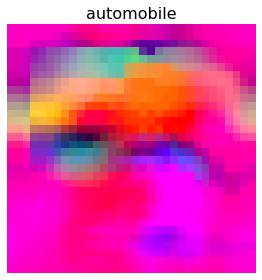

In [71]:
# Visualize 
class_names = label_names

f, ax = plt.subplots(figsize=(4, 4))
ax.imshow(activations.squeeze())
ax.set_title(class_names[class_score], fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()

Let's do the same procedure with all the other digits:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.
  """


Steps: 050	Scores: [[1296.885009765625]],	Regularization: [('TotalVariation2D', [26.240877151489258]), ('Norm', [44.85163497924805])]
Steps: 100	Scores: [[1354.7984619140625]],	Regularization: [('TotalVariation2D', [20.326242446899414]), ('Norm', [49.28379440307617])]
Steps: 150	Scores: [[1238.4820556640625]],	Regularization: [('TotalVariation2D', [14.938000679016113]), ('Norm', [52.940101623535156])]
Steps: 200	Scores: [[1362.90869140625]],	Regularization: [('TotalVariation2D', [18.170595169067383]), ('Norm', [56.255489349365234])]
Steps: 050	Scores: [[3844.146240234375]],	Regularization: [('TotalVariation2D', [64.2439956665039]), ('Norm', [42.15421676635742])]
Steps: 100	Scores: [[3089.3203125]],	Regularization: [('TotalVariation2D', [51.83378982543945]), ('Norm', [45.239994049072266])]
Steps: 150	Scores: [[4039.111083984375]],	Regularization: [('TotalVariation2D', [43.83063888549805]), ('Norm', [47.682777404785156])]
Steps: 200	Scores: [[3247.91064453125]],	Regularization: [('TotalV

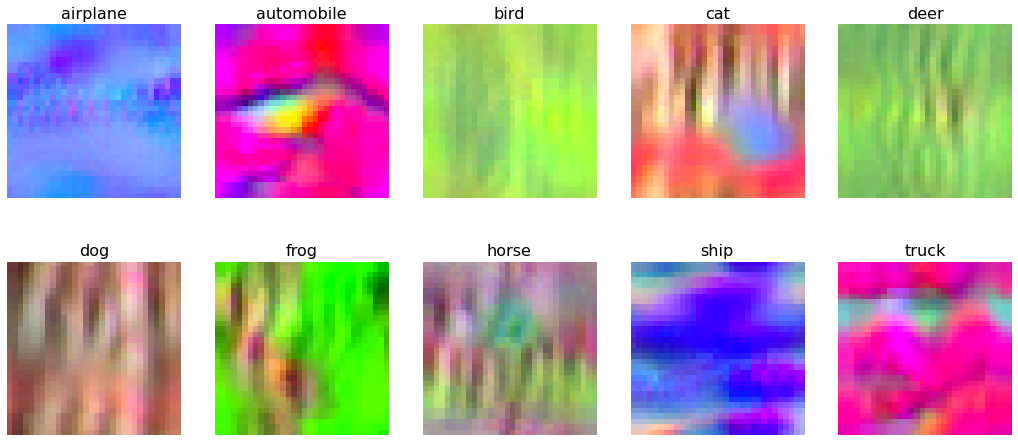

In [73]:
fig = plt.figure(figsize=(18, 8))
for kclass in range(0,n_classes):
    score = CategoricalScore(kclass)
    activation_maximization = ActivationMaximization(model,model_modifier,clone=False)
    activations = activation_maximization(score,callbacks=[Logger(interval=50)])
    ax = fig.add_subplot(2, 5, kclass+1)
    ax.imshow(activations.squeeze())
    ax.set_title(class_names[kclass], fontsize=16)
    ax.axis('off')

## Gradient-based interpretability

### GradCam

Grad-CAM: Visual Explanations from Deep Networks via Gradient-based Localization

https://arxiv.org/abs/1610.02391




In [99]:
for kclass in range(0,10):
    ind = np.argwhere(y_test1==kclass)
    print('class {} ind {}'.format(kclass,ind[0]))

class 0 ind [3]
class 1 ind [6]
class 2 ind [25]
class 3 ind [0]
class 4 ind [22]
class 5 ind [12]
class 6 ind [4]
class 7 ind [13]
class 8 ind [1]
class 9 ind [11]


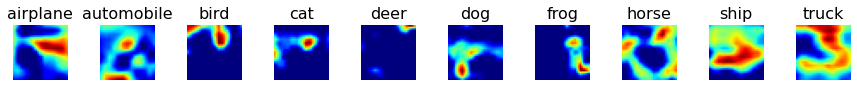

In [106]:
# Image titles
image_titles = class_names

# Load images and Convert them to a Numpy array
img0 = norm_im(x_test[3])
img1 = norm_im(x_test[6])
img2 = norm_im(x_test[25])
img3 = norm_im(x_test[0])
img4 = norm_im(x_test[22])
img5 = norm_im(x_test[12])
img6 = norm_im(x_test[4])
img7 = norm_im(x_test[13])
img8 = norm_im(x_test[1])
img9 = norm_im(x_test[11])


images = np.asarray([np.array(img0), np.array(img1),np.array(img2), np.array(img3),np.array(img4), 
                     np.array(img5),np.array(img6), np.array(img7),np.array(img8), np.array(img9)])
X = images.reshape(10,h,w,3)

score = CategoricalScore([0,1,2,3,4,5,6,7,8,9])

from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

# Create Gradcam object
gradcam = Gradcam(model,model_modifier=model_modifier,clone=False)

# Generate heatmap with GradCAM
cam = gradcam(score, X, penultimate_layer=-1)

# Render
f, ax = plt.subplots(nrows=1, ncols=n_classes, figsize=(12, 10))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(heatmap, cmap='jet', alpha=1) # overlay
    ax[i].axis('off')
plt.tight_layout()
plt.show()


### GradCam++

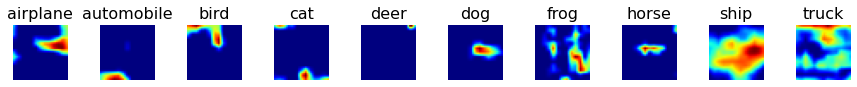

In [105]:
from tf_keras_vis.gradcam import GradcamPlusPlus

from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

# Load images and Convert them to a Numpy array
img0 = norm_im(x_test[3])
img1 = norm_im(x_test[6])
img2 = norm_im(x_test[25])
img3 = norm_im(x_test[0])
img4 = norm_im(x_test[22])
img5 = norm_im(x_test[12])
img6 = norm_im(x_test[4])
img7 = norm_im(x_test[13])
img8 = norm_im(x_test[1])
img9 = norm_im(x_test[11])


images = np.asarray([np.array(img0), np.array(img1),np.array(img2), np.array(img3),np.array(img4), 
                     np.array(img5),np.array(img6), np.array(img7),np.array(img8), np.array(img9)])
X = images.reshape(10,h,w,3)

score = CategoricalScore([0,1,2,3,4,5,6,7,8,9])

from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

# Create GradCAM++ object and repalce class name to "GradcamPlusPlus"
gradcamplus = GradcamPlusPlus(model,model_modifier,clone=False)

# Generate heatmap with GradCAM
camplus = gradcamplus(score, X, penultimate_layer=-1)

# Render
f, ax = plt.subplots(nrows=1, ncols=n_classes, figsize=(12, 10))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(camplus[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(heatmap, cmap='jet', alpha=1) # overlay
    ax[i].axis('off')
plt.tight_layout()
plt.show()